In [ ]:
import pandas as pd
import torch
import numpy as np
# import pandas as pd  # No need to import again
from transformers import AutoModel, AutoTokenizer

# Load the CodeT5+ model and tokenizer
checkpoint = "Salesforce/codet5p-110m-embedding"
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained(checkpoint, trust_remote_code=True)
model = AutoModel.from_pretrained(checkpoint, trust_remote_code=True).to(device)

# Function to encode data in batches
def encode_data_batch(df, model, tokenizer, device, start_row, end_row):
    embeddings = []
    for i in range(start_row, end_row):
        code = df['code'][i]  # Accessing the 'code' column
        inputs = tokenizer.encode(code, return_tensors="pt", max_length=512, truncation=True).to(device)
        with torch.no_grad():
            embedding = model(inputs)[0].cpu().numpy()  # Mean pooling to get fixed-size embeddings
        embeddings.append(embedding)
    return embeddings


# Process the data in batches
batch_size = 300
all_embeddings = []

# Load the DataFrame here to make it available in this cell's scope
df = pd.read_excel('/content/final ml excel (1).xlsx') # Load the dataframe here

start_row = 0
while start_row < len(df):
    end_row = min(start_row + batch_size, len(df))
    embeddings_batch = encode_data_batch(df, model, tokenizer, device, start_row, end_row)
    all_embeddings.extend(embeddings_batch)
    start_row = end_row

# Convert to numpy array and reshape if necessary
embeddings_array = np.vstack(all_embeddings)

# Create DataFrame from embeddings
embedding_columns = [f'code_embedding_{i}' for i in range(embeddings_array.shape[1])]
code_df = pd.DataFrame(embeddings_array, columns=embedding_columns)

code_df.to_csv("code_df.csv", index=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/511k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_codet5p_embedding.py:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Salesforce/codet5p-110m-embedding:
- configuration_codet5p_embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_codet5p_embedding.py:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Salesforce/codet5p-110m-embedding:
- modeling_codet5p_embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
import pandas as pd

import numpy as np

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/final final excel.xlsx'  # Replace with your file's path
data = pd.read_excel(file_path)

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())


   comment_embedding_0  comment_embedding_1  comment_embedding_2  \
0             0.017302             0.025468             0.068372   
1             0.017302             0.025468             0.068372   
2             0.017302             0.025468             0.068372   
3             0.017302             0.025468             0.068372   
4             0.017302             0.025468             0.068372   

   comment_embedding_3  comment_embedding_4  comment_embedding_5  \
0            -0.000841             -0.08036             -0.03609   
1            -0.000841             -0.08036             -0.03609   
2            -0.000841             -0.08036             -0.03609   
3            -0.000841             -0.08036             -0.03609   
4            -0.000841             -0.08036             -0.03609   

   comment_embedding_6  comment_embedding_7  comment_embedding_8  \
0            -0.056373             0.098055             -0.05235   
1            -0.056373             0.098055   

In [ ]:
data.shape

(1176, 1026)

In [ ]:
# Get basic statistics
print(data.describe())

# Check column data types
print(data.dtypes)

# Visualize correlation (optional, requires matplotlib or seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()


       comment_embedding_0  comment_embedding_1  comment_embedding_2  \
count          1176.000000          1176.000000          1176.000000   
mean              0.052258             0.023268            -0.009675   
std               0.025196             0.026835             0.047812   
min              -0.018442            -0.036285            -0.140594   
25%               0.036960             0.007895            -0.035705   
50%               0.053312             0.027273             0.003446   
75%               0.073780             0.043061             0.013010   
max               0.115504             0.102679             0.077983   

       comment_embedding_3  comment_embedding_4  comment_embedding_5  \
count          1176.000000          1176.000000          1176.000000   
mean              0.001112            -0.065277            -0.012426   
std               0.022537             0.031117             0.029896   
min              -0.077185            -0.136982            -0.0

ValueError: could not convert string to float: 'no error'

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Check the list of all columns
print("Columns in the dataset:", data.columns)

# View the data types
print("Data types in the dataset:")
print(data.dtypes)



Columns in the dataset: Index(['comment_embedding_0', 'comment_embedding_1', 'comment_embedding_2',
       'comment_embedding_3', 'comment_embedding_4', 'comment_embedding_5',
       'comment_embedding_6', 'comment_embedding_7', 'comment_embedding_8',
       'comment_embedding_9',
       ...
       'code_embedding_248', 'code_embedding_249', 'code_embedding_250',
       'code_embedding_251', 'code_embedding_252', 'code_embedding_253',
       'code_embedding_254', 'code_embedding_255', 'Count of Errors',
       'Type_of_error'],
      dtype='object', length=1026)
Data types in the dataset:
comment_embedding_0    float64
comment_embedding_1    float64
comment_embedding_2    float64
comment_embedding_3    float64
comment_embedding_4    float64
                        ...   
code_embedding_253     float64
code_embedding_254     float64
code_embedding_255     float64
Count of Errors          int64
Type_of_error           object
Length: 1026, dtype: object


In [ ]:
# Summary statistics of numerical columns
print("Summary statistics:")
print(data.describe())


Summary statistics:
       comment_embedding_0  comment_embedding_1  comment_embedding_2  \
count          1176.000000          1176.000000          1176.000000   
mean              0.052258             0.023268            -0.009675   
std               0.025196             0.026835             0.047812   
min              -0.018442            -0.036285            -0.140594   
25%               0.036960             0.007895            -0.035705   
50%               0.053312             0.027273             0.003446   
75%               0.073780             0.043061             0.013010   
max               0.115504             0.102679             0.077983   

       comment_embedding_3  comment_embedding_4  comment_embedding_5  \
count          1176.000000          1176.000000          1176.000000   
mean              0.001112            -0.065277            -0.012426   
std               0.022537             0.031117             0.029896   
min              -0.077185            -0.13

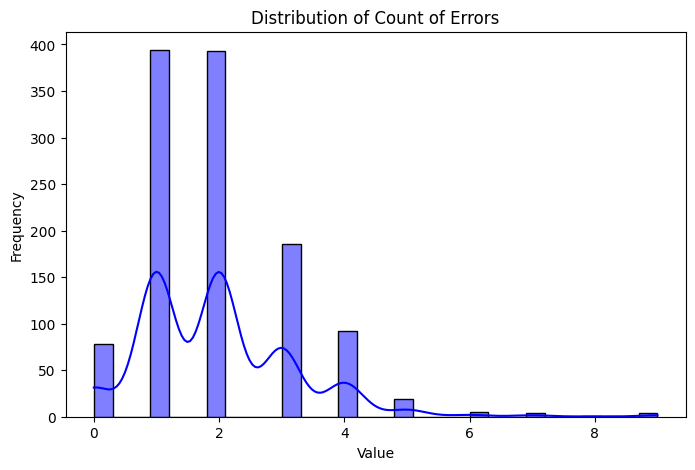

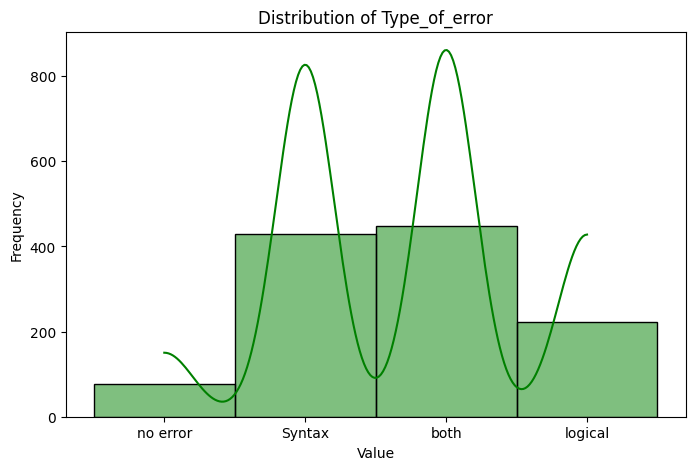

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of comment_embedding_0
plt.figure(figsize=(8, 5))
sns.histplot(data['Count of Errors'], kde=True, color='blue', bins=30)
plt.title('Distribution of Count of Errors')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Distribution of code_embedding_0
plt.figure(figsize=(8, 5))
sns.histplot(data['Type_of_error'], kde=True, color='green', bins=30)
plt.title('Distribution of Type_of_error')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


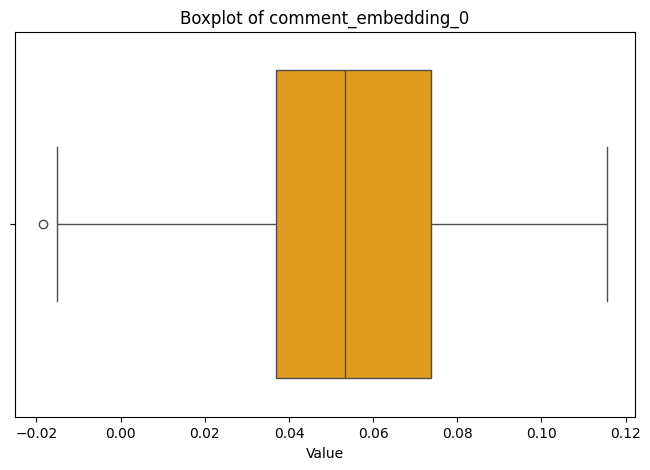

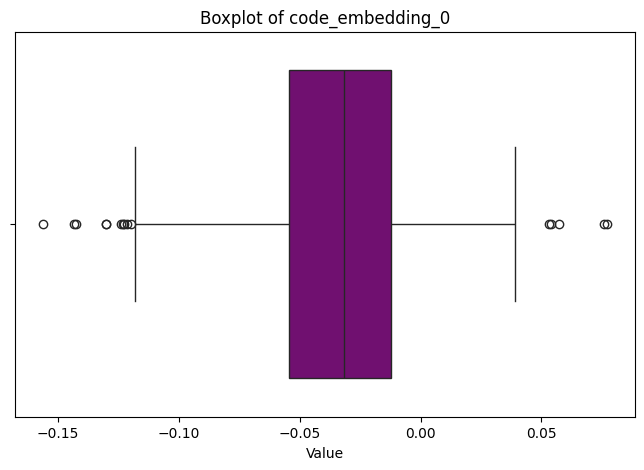

In [ ]:
# Boxplot for comment_embedding_0
plt.figure(figsize=(8, 5))
sns.boxplot(data=data['comment_embedding_0'], orient='h', color='orange')
plt.title('Boxplot of comment_embedding_0')
plt.xlabel('Value')
plt.show()

# Boxplot for code_embedding_0
plt.figure(figsize=(8, 5))
sns.boxplot(data=data['code_embedding_0'], orient='h', color='purple')
plt.title('Boxplot of code_embedding_0')
plt.xlabel('Value')
plt.show()


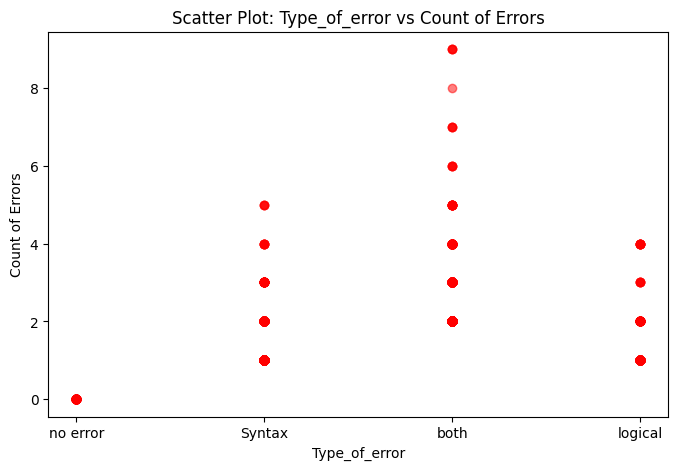

In [ ]:
# Scatter plot of comment_embedding_0 vs code_embedding_0
plt.figure(figsize=(8, 5))
plt.scatter(data['Type_of_error'], data['Count of Errors'], alpha=0.5, color='red')
plt.title('Scatter Plot: Type_of_error vs Count of Errors')
plt.xlabel('Type_of_error')
plt.ylabel('Count of Errors')
plt.show()


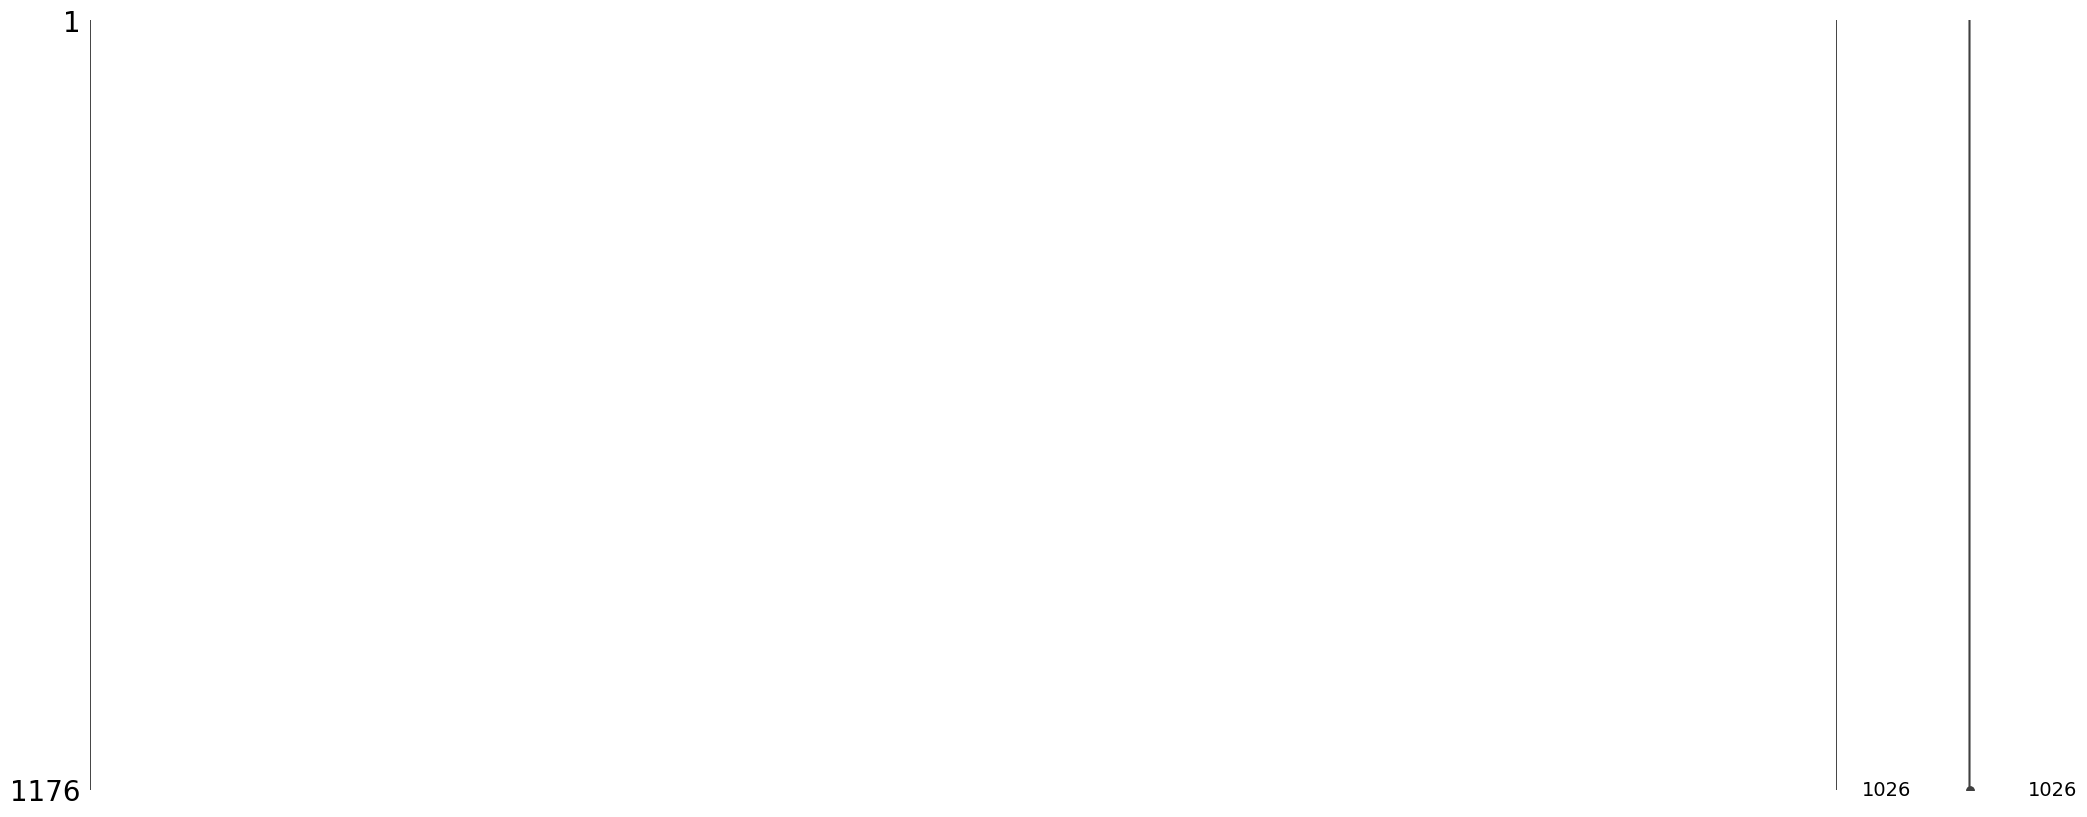

In [ ]:
import missingno as msno

# Visualize missing data
msno.matrix(data)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for scaling
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply MinMaxScaler
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Print a few rows of the scaled numeric data
print("Scaled Numeric Columns:")
print(data[numeric_columns].head())



Scaled Numeric Columns:
   comment_embedding_0  comment_embedding_1  comment_embedding_2  \
0             0.266854             0.444382             0.956027   
1             0.266854             0.444382             0.956027   
2             0.266854             0.444382             0.956027   
3             0.266854             0.444382             0.956027   
4             0.266854             0.444382             0.956027   

   comment_embedding_3  comment_embedding_4  comment_embedding_5  \
0             0.471135             0.320777              0.37591   
1             0.471135             0.320777              0.37591   
2             0.471135             0.320777              0.37591   
3             0.471135             0.320777              0.37591   
4             0.471135             0.320777              0.37591   

   comment_embedding_6  comment_embedding_7  comment_embedding_8  \
0             0.391382             0.591799             0.174432   
1             0.391382

In [ ]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Print the first few rows of the updated dataset
print("Data After One-Hot Encoding:")
print(data.head())


Data After One-Hot Encoding:
   comment_embedding_0  comment_embedding_1  comment_embedding_2  \
0             0.017302             0.025468             0.068372   
1             0.017302             0.025468             0.068372   
2             0.017302             0.025468             0.068372   
3             0.017302             0.025468             0.068372   
4             0.017302             0.025468             0.068372   

   comment_embedding_3  comment_embedding_4  comment_embedding_5  \
0            -0.000841             -0.08036             -0.03609   
1            -0.000841             -0.08036             -0.03609   
2            -0.000841             -0.08036             -0.03609   
3            -0.000841             -0.08036             -0.03609   
4            -0.000841             -0.08036             -0.03609   

   comment_embedding_6  comment_embedding_7  comment_embedding_8  \
0            -0.056373             0.098055             -0.05235   
1            -0.0

In [ ]:
# Verify scaling results
print("Summary of Scaled Numeric Columns:")
print(data[numeric_columns].describe())

# Verify dummy variables creation
print("Dataset Columns After Encoding:")
print(data.columns)


Summary of Scaled Numeric Columns:
       comment_embedding_0  comment_embedding_1  comment_embedding_2  \
count          1176.000000          1176.000000          1176.000000   
mean              0.527828             0.428547             0.598960   
std               0.188106             0.193106             0.218742   
min               0.000000             0.000000             0.000000   
25%               0.413617             0.317921             0.479871   
50%               0.535693             0.457370             0.658987   
75%               0.688503             0.570982             0.702746   
max               1.000000             1.000000             1.000000   

       comment_embedding_3  comment_embedding_4  comment_embedding_5  \
count          1176.000000          1176.000000          1176.000000   
mean              0.483189             0.406230             0.552753   
std               0.139081             0.176286             0.223415   
min               0.000000  

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=(['Count of Errors','Type_of_error_both', 'Type_of_error_logical',
       'Type_of_error_no error']))  # Replace with actual column name
y = data['Count of Errors']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
 data['Count of Errors'].value_counts()

,count
Count of Errors,
1,394
2,393
3,186
4,92
0,78
5,19
6,5
7,4
9,4


In [ ]:
data.columns

Index(['comment_embedding_0', 'comment_embedding_1', 'comment_embedding_2',
       'comment_embedding_3', 'comment_embedding_4', 'comment_embedding_5',
       'comment_embedding_6', 'comment_embedding_7', 'comment_embedding_8',
       'comment_embedding_9',
       ...
       'code_embedding_250', 'code_embedding_251', 'code_embedding_252',
       'code_embedding_253', 'code_embedding_254', 'code_embedding_255',
       'Count of Errors', 'Type_of_error_both', 'Type_of_error_logical',
       'Type_of_error_no error'],
      dtype='object', length=1028)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))


MAE: 182060483800.81375
RMSE: 1000293303567.1823
R²: -6.600186707208431e+23


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Define features and target for classification
X = data.drop(columns=['ERROR_COUNT', 'ERROR_TYPE_Type B', 'ERROR_TYPE_Type C'])
y = data[['ERROR_TYPE_Type B', 'ERROR_TYPE_Type C']]  # Multi-class labels

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Shapes of Train-Test Splits:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of Train-Test Splits:
X_train: (940, 1026)
X_test: (236, 1026)
y_train: (940, 2)
y_test: (236, 2)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
regressor = RandomForestRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R²: {r2}")


Regression Metrics:
Mean Absolute Error (MAE): 0.8211049359068427
Root Mean Squared Error (RMSE): 1.1763153670426079
R²: 0.08725588950933094


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the mapping between class indices (integers) and class labels (strings)
class_mapping = {0: 'ERROR_TYPE_Type A', 1: 'ERROR_TYPE_Type B', 2: 'ERROR_TYPE_Type C'}  # Adjust this as per your classes

# Convert the one-hot encoded y_test to single class labels (using idxmax)
y_test_labels = y_test.idxmax(axis=1)

# Predict class labels on the test set (ensuring they are class labels)
y_pred_class = classifier.predict(X_test)

# Ensure the predictions are class labels (in case of probabilities)
if y_pred_class.shape[1] > 1:  # This checks if the predictions are in multi-class (probability) format
    y_pred_class = y_pred_class.argmax(axis=1)  # Convert probabilities to class labels

# Convert integer predictions to string labels
y_pred_class = [class_mapping[label] for label in y_pred_class]

# Evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_class)
precision = precision_score(y_test_labels, y_pred_class, average='weighted')
recall = recall_score(y_test_labels, y_pred_class, average='weighted')
f1 = f1_score(y_test_labels, y_pred_class, average='weighted')
conf_matrix = confusion_matrix(y_test_labels, y_pred_class)

# Print evaluation metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Classification Metrics:
Accuracy: 0.1016949152542373
Precision: 0.36213311285655225
Recall: 0.1016949152542373
F1-Score: 0.15879633825795342
Confusion Matrix:
[[  0   0   0]
 [122  24   0]
 [ 73  17   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Assuming you already have the one-hot encoded target columns

# Convert the one-hot encoded target variables to class labels
y_train_labels = y_train.idxmax(axis=1)  # Convert one-hot to class labels
y_test_labels = y_test.idxmax(axis=1)    # Convert one-hot to class labels

# Create the model (for example, using RandomForest with class weights to handle imbalance)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train_labels)

# Predict on the test set
y_pred_class = model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test_labels, y_pred_class)
precision = precision_score(y_test_labels, y_pred_class, average='weighted')
recall = recall_score(y_test_labels, y_pred_class, average='weighted')
f1 = f1_score(y_test_labels, y_pred_class, average='weighted')
conf_matrix = confusion_matrix(y_test_labels, y_pred_class)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.5720338983050848
Precision: 0.5233436333967131
Recall: 0.5720338983050848
F1-Score: 0.5260830943415236
Confusion Matrix:
[[119  27]
 [ 74  16]]


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_labels)

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_class = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_class)
precision = precision_score(y_test_labels, y_pred_class, average='weighted')
recall = recall_score(y_test_labels, y_pred_class, average='weighted')
f1 = f1_score(y_test_labels, y_pred_class, average='weighted')
conf_matrix = confusion_matrix(y_test_labels, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.559322033898305
Precision: 0.5460721454058876
Recall: 0.559322033898305
F1-Score: 0.5508200966044302
Confusion Matrix:
[[101  45]
 [ 59  31]]


In [ ]:
pip install catboost xgboost lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset (update the file path as needed)
file_path = '/content/final final excel.xlsx'
data = pd.read_excel(file_path)

# Splitting features (X) and targets (y1, y2)
X = data.iloc[:, :-2]  # All columns except the last two are features
y1 = data['Count of Errors']  # Regression target
y2 = data['Type_of_error']  # Classification target

# Label encoding the classification target
label_encoder = LabelEncoder()
y2_encoded = label_encoder.fit_transform(y2)

# Reducing features to the top 20 using PCA
pca = PCA(n_components=20, random_state=42)
X_reduced = pca.fit_transform(X)

# Splitting the data for regression
X_train_reg, X_test_reg, y1_train, y1_test = train_test_split(X_reduced, y1, test_size=0.2, random_state=42)

# Initialize regression models
catboost_reg = CatBoostRegressor(verbose=0, random_state=42)
xgboost_reg = XGBRegressor(random_state=42)
lightgbm_reg = LGBMRegressor(random_state=42)

# Stacking regressor
stacking_reg = StackingRegressor(
    estimators=[('catboost', catboost_reg), ('xgboost', xgboost_reg), ('lightgbm', lightgbm_reg)],
    final_estimator=Ridge(),
)

# List of regressors
regressors = {
    'CatBoost': catboost_reg,
    'XGBoost': xgboost_reg,
    'LightGBM': lightgbm_reg,
    'Stacking': stacking_reg,
}

# Training and evaluating regressors
results_reg = {}

for name, model in regressors.items():
    print(f"Training {name}...")
    model.fit(X_train_reg, y1_train)
    predictions = model.predict(X_test_reg)
    rmse = np.sqrt(mean_squared_error(y1_test, predictions))
    results_reg[name] = rmse

# Print results
print("RMSE for each model:")
for name, rmse in results_reg.items():
    print(f"{name}: {rmse:.4f}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training CatBoost...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 20
[LightGBM] [Info] Start training from score 1.929787
Training Stacking...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 20
[LightGBM] [Info] Start training from score 1.929787
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5020
[LightGBM] [Info] Number of data points i

In [ ]:
from sklearn.metrics import r2_score

# Initialize models with default parameters
default_models = {
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'Stacking': StackingRegressor(
        estimators=[
            ('catboost', CatBoostRegressor(verbose=0, random_state=42)),
            ('xgboost', XGBRegressor(random_state=42)),
            ('lightgbm', LGBMRegressor(random_state=42))
        ],
        final_estimator=Ridge(),
    ),
}

# Train and evaluate models
r2_scores_default = {}

for name, model in default_models.items():
    print(f"Training {name} with default parameters...")
    model.fit(X_train_reg, y1_train)  # Train the model
    predictions = model.predict(X_test_reg)  # Predict on the test set
    r2 = r2_score(y1_test, predictions)  # Calculate R^2
    r2_scores_default[name] = r2
    print(f"{name}: R^2 = {r2:.4f}")

# Print all R^2 scores
print("\nR^2 values for default models:")
for name, r2 in r2_scores_default.items():
    print(f"{name}: {r2:.4f}")


Training CatBoost with default parameters...
CatBoost: R^2 = 0.1081
Training XGBoost with default parameters...
XGBoost: R^2 = -0.1367
Training LightGBM with default parameters...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 20
[LightGBM] [Info] Start training from score 1.929787
LightGBM: R^2 = -0.0074
Training Stacking with default parameters...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 20
[LightGBM] [Info] Start training from score 1.929787
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead 

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize models with default parameters
default_models = {
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'Stacking': StackingRegressor(
        estimators=[
            ('catboost', CatBoostRegressor(verbose=0, random_state=42)),
            ('xgboost', XGBRegressor(random_state=42)),
            ('lightgbm', LGBMRegressor(random_state=42))
        ],
        final_estimator=Ridge(),
    ),
}

# Train and evaluate models
metrics = {}

for name, model in default_models.items():
    print(f"Training {name} with default parameters...")
    model.fit(X_train_reg, y1_train)  # Train the model
    predictions = model.predict(X_test_reg)  # Predict on the test set

    # Calculate R^2, MAE, MSE
    r2 = r2_score(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    mse = mean_squared_error(y1_test, predictions)

    # Store the metrics
    metrics[name] = {'R^2': r2, 'MAE': mae, 'MSE': mse}

    # Print results for each model
    print(f"{name}: R^2 = {r2:.4f}, MAE = {mae:.4f}, MSE = {mse:.4f}")

# Print all metrics for comparison
print("\nMetrics for default models:")
for name, metrics_values in metrics.items():
    print(f"{name}: R^2 = {metrics_values['R^2']:.4f}, MAE = {metrics_values['MAE']:.4f}, MSE = {metrics_values['MSE']:.4f}")


Training CatBoost with default parameters...
CatBoost: R^2 = 0.1081, MAE = 0.8348, MSE = 1.3521
Training XGBoost with default parameters...
XGBoost: R^2 = -0.1367, MAE = 0.9209, MSE = 1.7232
Training LightGBM with default parameters...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 20
[LightGBM] [Info] Start training from score 1.929787
LightGBM: R^2 = -0.0074, MAE = 0.8655, MSE = 1.5272
Training Stacking with default parameters...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 20
[LightGBM] [Info] Start training from sc

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter grids for each model
param_grids = {
    'CatBoost': {
        'iterations': randint(50, 500),
        'learning_rate': uniform(0.01, 0.3),
        'depth': randint(3, 10),
    },
    'XGBoost': {
        'n_estimators': randint(50, 500),
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.3),
        'subsample': uniform(0.5, 0.5),
    },
    'LightGBM': {
        'n_estimators': randint(50, 500),
        'num_leaves': randint(20, 50),
        'learning_rate': uniform(0.01, 0.3),
        'feature_fraction': uniform(0.5, 0.5),
    },
}

# Initialize models
models = {
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
}

# Perform RandomizedSearchCV for each model
best_params = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=50,  # Number of parameter combinations to try
        scoring='neg_mean_squared_error',
        cv=3,  # 3-fold cross-validation
        random_state=42,
        n_jobs=-1,
    )
    search.fit(X_train_reg, y1_train)
    best_params[name] = search.best_params_
    print(f"Best parameters for {name}: {search.best_params_}")

# Print the best parameters for each model
print("\nFine-tuned parameters for each model:")
for name, params in best_params.items():
    print(f"{name}: {params}")


Tuning CatBoost...
Best parameters for CatBoost: {'depth': 7, 'iterations': 114, 'learning_rate': 0.01469092202235818}
Tuning XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.01691872751242473, 'max_depth': 5, 'n_estimators': 108, 'subsample': 0.6999304858576277}
Tuning LightGBM...
[LightGBM] [Warning] feature_fraction is set=0.7055185066591156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7055185066591156
[LightGBM] [Warning] feature_fraction is set=0.7055185066591156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7055185066591156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 20
[LightGBM] [Info] Start training from score 1.929787
Best parameters for LightGBM: {'feature_fraction': 0.70551

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize models with fine-tuned parameters
final_models = {
    'CatBoost': CatBoostRegressor(**best_params['CatBoost'], verbose=0, random_state=42),
    'XGBoost': XGBRegressor(**best_params['XGBoost'], random_state=42),
    'LightGBM': LGBMRegressor(**best_params['LightGBM'], random_state=42),
}

# Train and evaluate models with the fine-tuned parameters
metrics_finetuned = {}

for name, model in final_models.items():
    print(f"Training {name} with fine-tuned parameters...")
    model.fit(X_train_reg, y1_train)  # Train the model
    predictions = model.predict(X_test_reg)  # Predict on the test set

    # Calculate R^2, MAE, MSE
    r2 = r2_score(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    mse = mean_squared_error(y1_test, predictions)

    # Store the metrics
    metrics_finetuned[name] = {'R^2': r2, 'MAE': mae, 'MSE': mse}

    # Print results for each model
    print(f"{name}: R^2 = {r2:.4f}, MAE = {mae:.4f}, MSE = {mse:.4f}")

# Print all metrics for fine-tuned models
print("\nMetrics for fine-tuned models:")
for name, metrics_values in metrics_finetuned.items():
    print(f"{name}: R^2 = {metrics_values['R^2']:.4f}, MAE = {metrics_values['MAE']:.4f}, MSE = {metrics_values['MSE']:.4f}")


Training CatBoost with fine-tuned parameters...
CatBoost: R^2 = 0.1490, MAE = 0.8099, MSE = 1.2901
Training XGBoost with fine-tuned parameters...
XGBoost: R^2 = 0.1607, MAE = 0.8031, MSE = 1.2725
Training LightGBM with fine-tuned parameters...
[LightGBM] [Warning] feature_fraction is set=0.7055185066591156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7055185066591156
[LightGBM] [Warning] feature_fraction is set=0.7055185066591156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7055185066591156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 20
[LightGBM] [Info] Start training from score 1.929787
[LightGBM] [Warning] feature_fraction is set=0.7055185066591156, colsample_bytree=1.0 will be ignored. Curre

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Binarizer

# Initialize models with fine-tuned parameters
final_models = {
    'CatBoost': CatBoostRegressor(**best_params['CatBoost'], verbose=0, random_state=42),
    'XGBoost': XGBRegressor(**best_params['XGBoost'], random_state=42),
    'LightGBM': LGBMRegressor(**best_params['LightGBM'], random_state=42),
}

# Train and evaluate models with the fine-tuned parameters
metrics_finetuned = {}

# You can binarize the outputs to calculate classification metrics
binarizer = Binarizer()

for name, model in final_models.items():
    print(f"Training {name} with fine-tuned parameters...")
    model.fit(X_train_reg, y1_train)  # Train the model
    predictions = model.predict(X_test_reg)  # Predict on the test set

    # Calculate regression metrics
    r2 = r2_score(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    mse = mean_squared_error(y1_test, predictions)

    # Binarizing predictions and true values (e.g., rounding to the nearest integer)
    y_test_binarized = binarizer.fit_transform(y1_test.values.reshape(-1, 1))
    predictions_binarized = binarizer.transform(predictions.reshape(-1, 1))

    # Calculate classification metrics if needed
    accuracy = accuracy_score(y_test_binarized, predictions_binarized)
    precision = precision_score(y_test_binarized, predictions_binarized)
    recall = recall_score(y_test_binarized, predictions_binarized)
    f1 = f1_score(y_test_binarized, predictions_binarized)

    # Store the metrics
    metrics_finetuned[name] = {
        'R^2': r2, 'MAE': mae, 'MSE': mse,
        'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1
    }

    # Print results for each model
    print(f"{name}: R^2 = {r2:.4f}, MAE = {mae:.4f}, MSE = {mse:.4f}")
    print(f"Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")

# Print all metrics for fine-tuned models
print("\nMetrics for fine-tuned models:")
for name, metrics_values in metrics_finetuned.items():
    print(f"{name}:")
    print(f"  R^2 = {metrics_values['R^2']:.4f}, MAE = {metrics_values['MAE']:.4f}, MSE = {metrics_values['MSE']:.4f}")
    print(f"  Accuracy = {metrics_values['Accuracy']:.4f}, Precision = {metrics_values['Precision']:.4f}, Recall = {metrics_values['Recall']:.4f}, F1-Score = {metrics_values['F1-Score']:.4f}")


Training CatBoost with fine-tuned parameters...
CatBoost: R^2 = 0.1490, MAE = 0.8099, MSE = 1.2901
Accuracy = 0.9534, Precision = 0.9534, Recall = 1.0000, F1-Score = 0.9761
Training XGBoost with fine-tuned parameters...
XGBoost: R^2 = 0.1607, MAE = 0.8031, MSE = 1.2725
Accuracy = 0.9534, Precision = 0.9534, Recall = 1.0000, F1-Score = 0.9761
Training LightGBM with fine-tuned parameters...
[LightGBM] [Warning] feature_fraction is set=0.7055185066591156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7055185066591156
[LightGBM] [Warning] feature_fraction is set=0.7055185066591156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7055185066591156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 20
[LightGBM] [I

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to the features before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

# Apply PCA (select top 20 features)
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Now use the transformed features with PCA
final_models = {
    'CatBoost': CatBoostRegressor(**best_params['CatBoost'], verbose=0, random_state=42),
    'XGBoost': XGBRegressor(**best_params['XGBoost'], random_state=42),
    'LightGBM': LGBMRegressor(**best_params['LightGBM'], random_state=42),
}

# Train and evaluate models with the fine-tuned parameters and PCA features
metrics_finetuned = {}

# Binarizer for classification metrics (if needed)
binarizer = Binarizer()

for name, model in final_models.items():
    print(f"Training {name} with fine-tuned parameters and PCA features...")
    model.fit(X_train_pca, y1_train)  # Train the model with PCA features
    predictions = model.predict(X_test_pca)  # Predict on the test set

    # Calculate regression metrics
    r2 = r2_score(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    mse = mean_squared_error(y1_test, predictions)

    # Binarizing predictions and true values (e.g., rounding to the nearest integer)
    y_test_binarized = binarizer.fit_transform(y1_test.values.reshape(-1, 1))
    predictions_binarized = binarizer.transform(predictions.reshape(-1, 1))

    # Calculate classification metrics if needed
    accuracy = accuracy_score(y_test_binarized, predictions_binarized)
    precision = precision_score(y_test_binarized, predictions_binarized)
    recall = recall_score(y_test_binarized, predictions_binarized)
    f1 = f1_score(y_test_binarized, predictions_binarized)

    # Store the metrics
    metrics_finetuned[name] = {
        'R^2': r2, 'MAE': mae, 'MSE': mse,
        'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1
    }

    # Print results for each model
    print(f"{name}: R^2 = {r2:.4f}, MAE = {mae:.4f}, MSE = {mse:.4f}")
    print(f"Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")

# Print all metrics for fine-tuned models
print("\nMetrics for fine-tuned models with PCA features:")
for name, metrics_values in metrics_finetuned.items():
    print(f"{name}:")
    print(f"  R^2 = {metrics_values['R^2']:.4f}, MAE = {metrics_values['MAE']:.4f}, MSE = {metrics_values['MSE']:.4f}")
    print(f"  Accuracy = {metrics_values['Accuracy']:.4f}, Precision = {metrics_values['Precision']:.4f}, Recall = {metrics_values['Recall']:.4f}, F1-Score = {metrics_values['F1-Score']:.4f}")


Training CatBoost with fine-tuned parameters and PCA features...
CatBoost: R^2 = 0.1421, MAE = 0.8179, MSE = 1.3006
Accuracy = 0.9534, Precision = 0.9534, Recall = 1.0000, F1-Score = 0.9761
Training XGBoost with fine-tuned parameters and PCA features...
XGBoost: R^2 = 0.1559, MAE = 0.8079, MSE = 1.2797
Accuracy = 0.9534, Precision = 0.9534, Recall = 1.0000, F1-Score = 0.9761
Training LightGBM with fine-tuned parameters and PCA features...
[LightGBM] [Warning] feature_fraction is set=0.7055185066591156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7055185066591156
[LightGBM] [Warning] feature_fraction is set=0.7055185066591156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7055185066591156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train 

In [ ]:
# Ensure all necessary libraries are imported
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set XGBoost with fine-tuned parameters
xgb_model = XGBRegressor(random_state=42, **best_params['XGBoost'])

# Train the XGBoost model with all features and fine-tuned parameters
print("\nTraining XGBoost with fine-tuned parameters and all features...")
xgb_model.fit(X_train_reg, y1_train)  # Train with all features

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_reg)  # Predictions

# Calculate regression metrics
r2_xgb = r2_score(y1_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y1_test, y_pred_xgb)
mse_xgb = mean_squared_error(y1_test, y_pred_xgb)

# Print the results
print(f"XGBoost (fine-tuned, all features):")
print(f"R^2 = {r2_xgb:.4f}")
print(f"MAE = {mae_xgb:.4f}")
print(f"MSE = {mse_xgb:.4f}")

# Print first 10 predictions and true values for inspection
print("\nFirst 10 Predictions (y_pred) and True Values (y_test):")
print(f"Predictions (y_pred): {y_pred_xgb[:10]}")
print(f"True values (y_test): {y1_test.values[:10]}")



Training XGBoost with fine-tuned parameters and all features...
XGBoost (fine-tuned, all features):
R^2 = 0.1607
MAE = 0.8031
MSE = 1.2725

First 10 Predictions (y_pred) and True Values (y_test):
Predictions (y_pred): [2.0382972 1.564368  1.9482008 1.7217904 2.6036334 1.7769572 1.5360156
 1.6183535 2.5507872 2.0987127]
True values (y_test): [2 2 3 2 3 2 1 1 3 1]
